# Homework 4 - Hard coding

## 1. Hashing task!

We computed the posterior probability in the following way: first of all it is necessary to consider that a false positive occurs when all the hashing functions returns a value that is set as True in the Bloom Filter, and this value is $k$, secondly, all the events $H_i = \{the\ i-th\ hashing\ function\ returns\ a\ value\ that\ is\ set\ to\ true\ into\ the\ BloomFilter\}$ are independent. So the $P(A|B) = P(A \cap B)/P(B)$ = P(A) = $P(H_1 \cap H_2 \cap ... H_i) = P(H_1) \times P(H_2) \times ... \times P(H_i) =  Ber(p)$ where: $A = \{false\ positive\}$, $B = \{the\ password\ isn't\ contained\ into\ the\ first\ set\} = \omega$ and $p = |variables\ set\ to\ true|$ \ $lenght\ of\ the\ bloomFilter\ array$

In [9]:
import time
import numpy as np

# all the hashing functions that are used into the bloom filter algoritm uses the ord() function to transform a letter into 
# it's corresponding ascii's value and then they used different tecniques and methods to generate the values. In the end of the
# function the calculated value it's divided with the module by the lenght of the bloom filter to be sure that the value won't 
# overtake the maximium position of it
def hashFun1(s, bloomLen):
    res = 1
    for i in range(len(s)):
        res *= int(ord(s[i]) / (i+2))
    return res % bloomLen

def hashFun2(s, bloomLen):
    res = 1
    for i in range(len(s)):
        res *= int(ord(s[i]) / (i+1))
    return res % bloomLen

def hashFun3(s, bloomLen):
    res = 2166136261
    for i in range(len(s)):
        res ^= ord(s[i]); res *= 16777619
    return res % bloomLen

def hashFun4(s, bloomLen):
    a = b = c = 0
    for i in range(0, len(s), (len(s)//5)+1):
        if i <= 1:
            a *= ord(s[i])<<i + ord(s[i+1])<<(i+1)
            b *= ord(s[i+2])<<i + ord(s[i+3])<<(i+1)
            c *= ord(s[i+4])<<i
        else:
            a += ord(s[i])<<(i-1) + ord(s[i+1])<<i
            b += ord(s[i+2])<<(i-1) + ord(s[i+3])<<i
            c += ord(s[i+4])<<(i-1)
    return (a+b-c) % bloomLen

def hashFun5(s, bloomLen):
    a = b = 0
    for i in range(0, len(s), (len(s)//4)-1):
        a += ord(s[i])<<(i) + ord(s[i+1])<<(i+1)
        b += ord(s[i+2])<<(i) + ord(s[i+3])<<(i+1)
    return (a+b) % bloomLen

# this function inizialize the bloom filter array setting with value true the variables into the position returned by the hash 
# functions and returns the bloom filter array
def initBloomFilter(bloomLen, path):
    bloomFil = np.array([False for i in range(bloomLen)])
    fPass1 = open(path, "r", encoding="utf-8")
    for i in range(100000000):
        password = fPass1.readline()[:20]

        # changes the values according the values returned by the hashing functions
        bloomFil[hashFun1(password, bloomLen)] = True; bloomFil[hashFun2(password, bloomLen)] = True
        bloomFil[hashFun3(password, bloomLen)] = True; bloomFil[hashFun4(password, bloomLen)] = True
        bloomFil[hashFun5(password, bloomLen)] = True
    fPass1.close()
    return bloomFil
    
# this function takes one by one the passwors that are into the second file, applies the hashing functions and controls if for 
# all the returned value the value contained into the bloom filter is setted to true. If this happens does an increment of the
# result value 
def passCheck(path, bloomLen, bloomFil):
    n = 0
    fPass2 = open(path, "r", encoding="utf-8")
    for i in range(3900000):
        password = fPass2.readline()[:20]
        h1 = hashFun1(password, bloomLen); h2 = hashFun2(password, bloomLen)
        h3 = hashFun3(password, bloomLen); h4 = hashFun4(password, bloomLen); h5 = hashFun5(password, bloomLen)
        if bloomFil[h1] == True and bloomFil[h2] == True and bloomFil[h3] == True and bloomFil[h4] == True and bloomFil[h5] == True:
            n += 1
    fPass2.close()
    return n

# initialisation of variables, I choose 725000000 as the lenght of the bloom filter because to have a prior probability of 
# about 3% i have to do 5 hashing functions and a vector of that size
k = 5; bloomLen = 725000000
start = time.time()

# inizialises the bloomFilter array of bit values
blFilter = initBloomFilter(bloomLen, "C:\\Users\\asus\\Desktop\\Algoritmic methods for data science\\ADM-HM4\\passwords1.txt")

# check all passwords2 presence in the filter
n = passCheck("C:\\Users\\asus\\Desktop\\Algoritmic methods for data science\\ADM-HM4\\passwords2.txt", bloomLen, blFilter)

# calculating the prior and posterior probability of false positive (as explained earlier)
pPr = ((1 - (1/2.71) ** ((k * 100000000) / bloomLen)) ** k)
numTrue = 0
for i in range(len(blFilter)):
    if blFilter[i] == True:
        numTrue += 1
pPos = (numTrue/bloomLen) ** k

end = time.time()

# prints the result
print('Number of hash function used: ', k)
print('Number of duplicates detected: ', n)
print('Probability of false positives previous the creation of the bloom filter: ' + str(round(pPr * 100, 5)) + "%")
print('Probability of false positives after the creation of the bloom filter: ' + str(round(pPos * 100, 5)) + "%")
print('Execution time: ', end-start)

Number of hash function used:  5
Number of duplicates detected:  1816133
Probability of false positives previous the creation of the bloom filter: 3.03829%
Probability of false positives after the creation of the bloom filter: 0.01836%
Execution time:  3004.940136909485


## 2. Alphabetical Sort

The counting sort counts the number of objects that have different keys. Let us see how we can implement a program based on this technique.

### 1) The implementation of the algorithm

#### Since we deal with characters, we considered their unicode value.
The ord function will enable us to get the encoded version of the character. First, we got the maximum ASCII value in the input list.

We used the following Youtube video to understand how this algorithm works : https://www.youtube.com/watch?v=LoNoeNiTZHI.
We also used ideas thanks to the link you wrote on the README.md (https://www.hackerearth.com/fr/practice/algorithms/sorting/counting-sort/tutorial/). We still wrote our own programs.

In [10]:
def CountingSort(L, maxi): 

    n = maxi
    
    orderedascii = [0]*(n+1) # We initialize the ordered list
    
    index = ["0"]*(n+1) # This list will be useful for part 3, in order to retrieve the initial position of each letter in a list of words
    
    count = [0]*(n+1) # We initialize the count list
    
   
    for k in range(len(L)): 
        count[L[k]] += 1

    for k in range(n+1):
        count[k] += count[k-1] 

    for k in range(len(L)): 
        orderedascii[count[L[k]]-1] = chr(L[k])
        index[count[L[k]]-1] = k
        # As specified in the video, I used the rule according to which we have to substract one to the list "count" at the index of the ascii version of each string
        count[L[k]] = count[L[k]] - 1
    
        
    orderedstring = list(filter(lambda a: a != 0, orderedascii))

    index = list(filter(lambda a: a != "0", index))
    
    return(orderedstring,index)

# We return the index for the 3rd part of this exercise

As you can see, the program sorts the input list and gives the ordered version of it as an output. We can also underline that the uppercase and lowercase are considered as different characters.

Indeed, the ASCII alphabet gives a number (a kind of ID) to each letters but also to the numbers and some special characters.

### 2) Alphabetical sort

The creation of this program is not that hard : he just have to get the maximum of the unicode ID of each letter and figure out the maximum. After that, we can use the function created above to get our sorted alphabet.

To enable an accurate sorting (in particular for part 3 of this exercise), we decided to sort regarding the lower case version of each word !

In [11]:
def AlphabeticalSort(letters):
    
    av = [ord(i.lower()) for i in letters if type(i) == str] # This is the ASCII version of the input list

    n = max(av)
    
    return(CountingSort(av,n))


alphabetunordered = ["n","b","v","c","x","w","m","l","k","j","h","g","f","d","s","q","p","o","i","u","y","t","r","e","z","a"]

print(AlphabeticalSort(alphabetunordered)[0])

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In this function, we just enter the list of letters we want to order. The program gets the unicode indices of these characters and determines the maximum amongst them. After retrieving this piece of information, we use it as the second parameter of the function CountingSort, alongside the original list.

##### We can also verify that, by repeating several characters , the sorting still works.

In [12]:
alphabetunordered2 = ["n","a","b","b","b","v","c","x","w","m","l","k","j","h","g","f","d","s","q","p","o","i","u","y","t","r","e","z","a"]

print(AlphabeticalSort(alphabetunordered2)[0])

['a', 'a', 'b', 'b', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


It works as we wanted, with 'a' repeating two times and 'b' three times.

### Complexity :

This program is interesting since it enable us to sort letters (or number) with **linear** complexity.
Indeed, if we think about it theoretically, we only use "for loops", that go until the maximum of the ASCII values of the input list, and other loops that go over the items of the input list. We must note that the counting sort is usually used to sort lists of numbers. Since we are considering **characters**, it is normal that we get a maximum (the range) that is quite big.

Practically, we have :

- In the CountingSort function :
    - 3 for loops that goes until the length of the input
    - 1 for loop that goes until the maximum of the ASCII indices of the items in the input list
    - 13 fast operations (like additions or comparison)

- In the AlphabeticalSort function :
    - The complexity of the CountingSort function
    - 1 loop over the values of the input list
    - 1 operation with a built-in function (max)

We then have a complexity equal to :

$ complexity $ = $ 10 + 4*len(input) + complexity(built in function "max") + maximum(ASCII values) $

We have $ complexity(built in function "max") = len(input)$ since it goes over all the values of the input.

If we write $ n = len(input) $ and $ k = maximum(ASCII values) $ and apply the $O$ method, we get :


### $ Complexity = O(5*n+k) = O(n+k) = O(n) $


All in all, we can say that Counting Sort is almost as fast as the *sorted()* method of python, since it has a linear complexity.

### 3) Generalized sorting : list of words
In this part, the sorting gets more tricky. Indeed, we have to sort words regarding the alphabet but also be careful if some words several first letters in common. Let us define a strategy to deal with all the cases.

##### As mentioned in the instructions, we have to deal with the white spaces (first policy on the Wikipedia page).
Example : "ADM" will be put before "ADM HW4".

In [13]:
L = ["A","Amma","Aza","Anq","Padrema",'Padre ta',"Mauro Icardi","Ama mama", "1", "Meazza",'Mauro','Padre']
m = ["Oak", "Oak Hill", "Oak Ridge", "Oakley Park", "Oakley River"]
n = ["av","za","pa"]


def preprocess(liste):
    return([item.lower() for item in liste])


def sortingwords(l):
    
    if len(l) < 2: # If the list has only one element, we directly return it
        return l
    
    elif all(len(set([l[j][0] for j in range(len(l))]))==len(l) for j in range(len(l))): # If we only have different first letters, we can directly apply the AlphabeticalSort
        
        first = [l[j][0] for j in range(len(l))]
        
        return([l[i] for i in AlphabeticalSort(first)[1]])
    
    
    array = preprocess(l) # We preprocess the words to have them with the first letter capitalized
    
    head, *tail = array # We divide the liste into two parts : a first word and a list of the other words we are going to compare to the first one
    head1, *tail1 = l
    
    sort1 = []
    sort2 = []
    for k in range(len(tail)): # We go over each word in tail to apply the alphabetical sorting on its letter, in comparison with the letters of the head
        
        i = 0
        if tail[k][0] == head[i] and len(tail[k]) > 1:
            while i<len(tail[k])-1 and i<len(head)-1 and tail[k][i] == head[i]: # While the letters of the head are the same as the ones of the tail, we don't sort the two words
                i+=1
                
        # The following two conditions handle the multiwords cases (if we meet a whitespace)
        
        if i == len(tail[k])-1 and i != len(head)-1: # Example : if we have tail = "ADM" and head = "ADM Course", tail will be put before head
            sort1.append(tail1[k])
        elif i == len(head)-1 and i != len(tail[k])-1: # Example : if we have head = "ADM" and tail = "ADM HW4", tail will be put after head
            sort2.append(tail1[k])
            
            
        # In the other cases, we can simply apply the AlphabeticalSort function to sort the words ! 
        
        else: 
            tosort = [tail[k][i],head[i]]
            
            
            ind = AlphabeticalSort(tosort)[1] # We sort two words according on the first letter they don't have in common (If we don't exceed the length of one of the two words before)
            
            sortedl = [tosort[u] for u in ind]
            if tosort == sortedl :
                sort1.append(tail1[k]) # If the two words haven't switched places after applying the counting sort, it means that they are already sorted
            else:
                sort2.append(tail1[k]) # Otherwise, we switch their positions

    less = sortingwords(sort1)
    more = sortingwords(sort2)
    return less + [head1] + more # We return the ordered list of words 

print(sortingwords(m))

['Oak', 'Oak Hill', 'Oak Ridge', 'Oakley Park', 'Oakley River']


As we can see, the sorting is the same as in the Wikipedia page, considering the first policy mentioned for multiwords.

The general principle is that we take one element from the list of words and sort it in comparision with all the other words. Once we get that there is only one element at the left or the right of an element, we got the final position of it. We do the same process for all the items in the input list.

The following block of code will enable us to test the code for different examples of lists. **Please note that it also works for numbers. Still, the instructions only asked for letters so we will stick to them for the examples.**

In [14]:
m = 7
print("Please enter "+str(m)+" words separated by a comma")
inp = input()
inputlist = inp.split(",")

print(sortingwords(inputlist))

Please enter 7 words separated by a comma
Mahdi,Luca,Giorgio,adm,ADM HWA,ADM HWB,Luca Giorgio
['adm', 'ADM HWA', 'ADM HWB', 'Giorgio', 'Luca', 'Luca Giorgio', 'Mahdi']


#### Now that we created and explained the algorithm, let us explore its complexity, from a theoretical and practical point of view.

### Complexity
### Theoretically :

To sort words, we have to check the similarity between words by looking at their common letters. While they are equal, we keep going. Once a different letter is found, we can sort them. The complexity seems logically much greater than the one of the alphabetical sort. Since we had a **linear complexity** before, we already know that it won't be linear but at least **polynomial**. 

Indeed, by checking each letter of a given word, we go over the range of two "lists" (the list of words and the list of letters of a given word). Theoretically, the complexity would be the smallest if our list only words with **different** first letters. We would only have to sort them on their first letters and the complexity would be the same as the one of the alphabetical sort.


### Practically :

Here, we managed to sort the words by implementing a **recursive** function. It calls itself many times (at least 2 times in the best case, 2*len(liste) in the worst case). Let m be the length of the list and n the maximum length of a word.


- In the best case : the list only has words with distinct first letters. We can directly apply the AlphabeticalSort algorithm. The complexity becomes :

$ Complexity = Complexity(AlphabeticalSort) + 3*len(liste) + 2 comparisons = Complexity(AlphabeticalSort) + 3*m + 2 = O(n+k+m) = O(n+m) $


- In the worst case : ALL the first letters are the same and, if the number of words is even, each pair of words has the same letters (until the last letter of the smallest word between the two ones). In the algorithm, we indent a number **i** while the two words have the same letters. In this worst case, we consider that this i reaches the last index of the last element of head or tail. If we consider k = length of the word considered as the "head", we would have a complexity of :

$ Complexity = m*(Complexity(AlphabeticalSort) + u) + Complexity(sortingwords(leftlist)) + Complexity(sortingwords(rightlist)) + 20 operations $ (with comparisons, append operations...)   

with u the index of the letter in a word until which we match the letters of the other word. Please note that u <= len(word) <= n. In the worst case, u = n. Hence, we can write that the complexity is approximately :

$ Complexity = O(n*m+k) = O(m*n) $

We can then see that the complexity can be polynomial (but can also be lower in an easier case, where all the first letters of the list are different).

In conclusion, we can say that the complexity of this algorithm is close to the one of the built-in function of python, sorted, even in the worst case.

# 3. Find similar wines!

We are asked to find a set of similar wines according to some characteristics by resorting to K-Means clustering and to implement the aforementioned by ourselves.
First thing first, let us import our custom library (which contains every function built to realize from scratch the clustering procedure) and some visualization utilities.

In [1]:
import clustering_lib as cl
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The second step will consist in creating the dataframe: we will not just import the data, the final structure will include three additional columns, namely: "Principal Component 1", "Principal Component 2" and "Principal Component 3". As the names suggest, those are the results of a PCA ran over our data.
We decided to carry this out in order to better visualize the clouds of points discriminated by the "Type" attribute.
Furthermore, since we are dealing with a clustering problem, we decided to scale all values so that they will become adimensional and improve comparability. We will print the first five rows to take a look.

In [2]:
processed_dataframe = cl.dataframe()

And now, let us draw a scatterplot to verify the success of our previous choice.

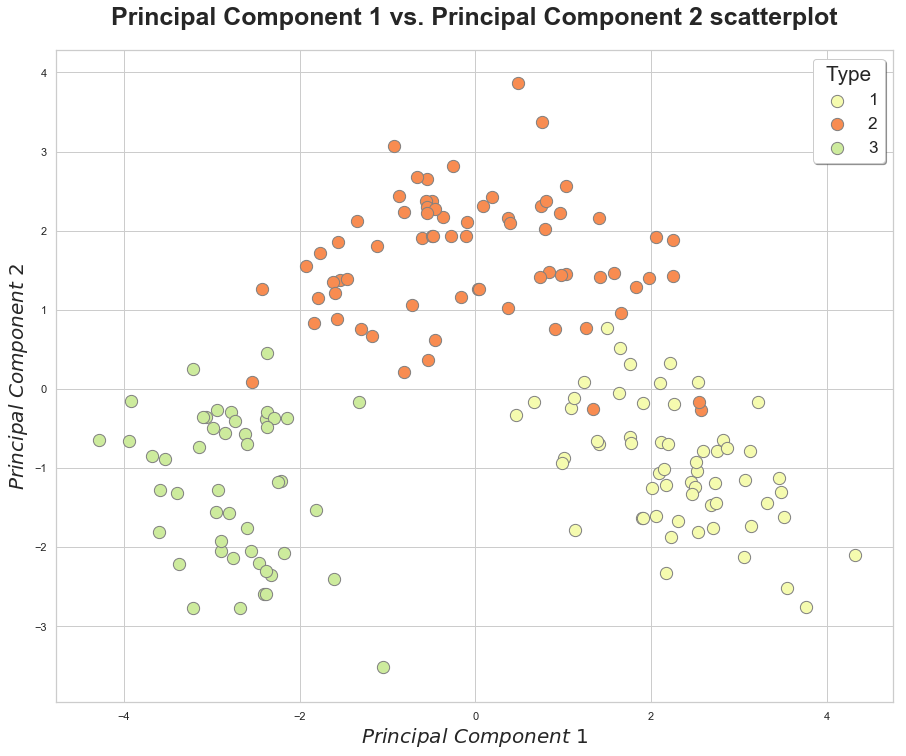

In [3]:
cl.scatterplot(processed_dataframe, 'Principal Component 1', 'Principal Component 2', color ='Type')

As we can see, extracting principal components, instead of randomly picking variables, allows us to perfectly recognize the clustering pattern defined by the pre-existing "Type" attribute. Our aim, at this point, will be that of verifying if a K-means algorithm can succeed in reproducing the same result.

The next move will be setting up the values taken as input by our k_means clustering function and running the algorithm.

In [5]:
max_iterations, k = 100, 3
# The value of max_iterations is set to 500 by default, while that of k to 1.

Since the functions returns four different values, we store them into four new variables.

In [6]:
centroids, clusters_changes, iterations, data_and_distances = cl.k_means(processed_dataframe, max_iterations, k)

The K-means algorithm converged after 9 iterations.


Here we print the centroids resulting from the last iteration of the algorithm.

In [7]:
centroids.drop(columns = list(centroids.columns[13:19]))

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
Centroids,,,,,,,,,,,,,
0.0,-0.926820,-0.371033,-0.450278,0.211241,-0.604859,-0.057025,0.036270,-0.004706,0.002319,-0.904000,0.446860,0.275848,-0.776474
1.0,0.780928,-0.329278,0.294308,-0.625796,0.655551,0.836537,0.932697,-0.573949,0.619046,0.139587,0.488313,0.758352,1.088740
2.0,0.164907,0.871547,0.186898,0.524367,-0.075473,-0.979330,-1.215248,0.726064,-0.779706,0.941539,-1.164789,-1.292412,-0.407088


While here we are creating a dictionary with the data needed to draw an animated scatterplot. This choice was made in order to allow a better visualization of what happened during the execution of the algorithm.

In [8]:
plot_data = {'clusters_changes': clusters_changes, 'iterations': iterations, 'K': k, 'data': data_and_distances}

**N.B.** The animated plot, on GitHub, will only be visible through NBViewer, so we kindly ask you to switch to this mode.

<IPython.core.display.Javascript object>


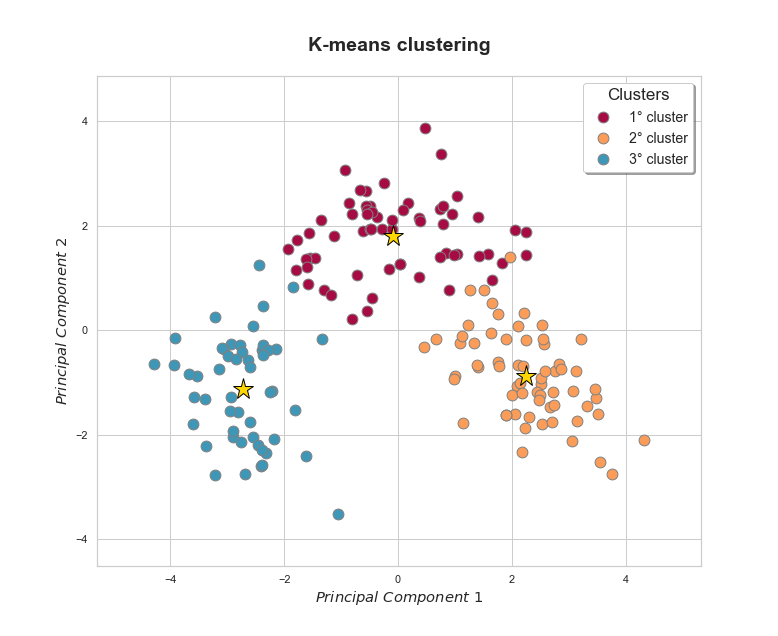

In [17]:
%matplotlib notebook
k_means_clustering_plot = cl.SubplotAnimation(plot_data)
plt.show()
HTML(k_means_clustering_plot.to_jshtml())

As a bonus, we resorted to three-dimensional plotting to better understand how the clusters are positioned in space.

<IPython.core.display.Javascript object>


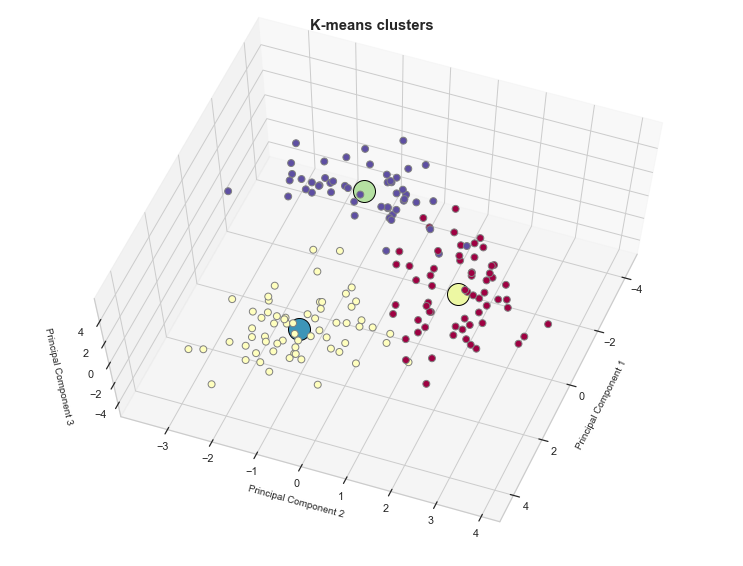

In [10]:
scatterplot_3D = cl.scatterplot_3D(data_and_distances, centroids)

### Bonus Clustering
We decided to implement K-Means via PySpark too, making use of the Map/Reduce paradigm.

In [11]:
import numpy as np
from pyspark.sql import SparkSession

In here we generate a txt file of random integers that will constitute the data over which the algorithm will be run.

In [12]:
f = open("points.txt", "w+")
for i in range(50):
    random_numbers = ''.join(str(np.random.randint(100, size = 3)).strip('[').strip(']'))
    f.write(random_numbers.strip().replace('  ', ' ') + '\n')
f.close() 

This one, instead, is a custom function to evaluate the distance among points and centroids, that we will use in the Map/Reduce phase.

In [ ]:
def closest_point(point, centroids):
    best_index = 0
    closest = float('+inf')
    for i in range(len(centroids)):
        temporary_distance = np.sum((point - centroids[i]) ** 2)
        if temporary_distance < closest:
            closest = temporary_distance
            best_index = i
    return best_index

In [13]:
spark = SparkSession.builder.appName("K-means").getOrCreate()

rows_from_txt = spark.read.text('points.txt').rdd.map(lambda row: row[0])
data = rows_from_txt.map(lambda row: np.array([float(x) for x in row.split(' ')]))
number_of_centroids = 3
tollerance = 0.001
k = data.takeSample(False, number_of_centroids, 1)
temporary_distance = 1.0

while temporary_distance > tollerance:
    closest_points = data.map(lambda point: (closest_point(point, k), (point, 1)))\
                         .reduceByKey(lambda point1_centroid1, point2_centroid2:\
                                     (point1_centroid1[0] + point2_centroid2[0], point1_centroid1[1] + point2_centroid2[1]))\
                         .map(lambda st: (st[0], st[1][0] / st[1][1])).collect()
    temporary_distance = sum(np.sum((k[index] - point) ** 2) for (index, point) in closest_points)
    for (index, point) in closest_points:
        k[index] = point

print("Last iteration Centroids: " + str(k))

spark.stop()

Last iteration Centroids: [array([67.875 , 66.9375, 80.375 ]), array([52.85, 57.95, 20.85]), array([34.5       , 24.78571429, 65.07142857])]


## Fourth Exercise

<div style="text-align: justify">
The practical impossibility, in applications of concrete interest, of enumerating the full set of partitions of $n$ elements in $g$ distinct groups, makes the 'optimal' classification one reaches through K-means potentially corresponding to a local minimum of the objective function:
<br>
<br>
<div style="text-align: center">
$ \arg \underset{S} \min \sum_{i=1}^{k} \sum_{x \in S_i} ||x-\mu_i||^2 = \arg \underset{S} \min \sum_{i=1}^{k} |S_i| Var(S_i)$
</div>
<br>
(based on the computation of deviance "within" among the clusters). In such situations, the obtained solution can depend on the starting configuration, picked in the first step of the iterative procedure. To correctly interpret the results, it is of great importance to accurately evaluate the criteria by means of which one got to the initial partition.
<br>
Once the number of clusters has been determined, one must detect the poles which will constitute the centroids in the opening partition.
<br>
A very simple and inexpensive criterion consists in taking as starting seeds the first $g$ observations of the dataset. A slightly more formalized method leads, instead, to obtaining the poles via drawing a random sample of $g$ units from the $n$ that compose the dataset.
<br>
Both the aforementioned rules, nevertheless, do not seem to be very satisfying, since they cannot guarantee the the initial seeds are effectively representative of the whole cloud of points in the $p$-dimensional space.
<br>
Such requirement, indeed, has a preminent relevance in real applications, since it allows us to improve the convergence speed of non-hierarchical algorithms. It enhances the capability of those methods to provide, in quick times, a final classification very near to the optimal solution (in terms of intra-clusters homogeneity) and to identify the group structures really present in the data.
<br>
Poles representatitvity is usually pursued by locating sufficiently spaced observations in $R^p$. For instance, one could pinpoint $g$ elements which reciprocal distance is not lesser than a fixed threshold. 
<br>
The aim of such expedients is to generate finely spaced centroids in the initial partition, so that each point gets sufficiently near to one of them.
On the basis of this short introduction, we want to execute two different verions of the K-means algorithm and compare the results, in order to verify if there is a concrete enhancement in selecting a proper initialization method.
<br>
In particular, we will resort to Random Initialization and K-means++ options.
</div>

As usual, let us import our custom library.

In [19]:
import theoretical_lib as tl

The dataframe we chose to run our experiment can be found here https://archive.ics.uci.edu/ml/datasets/3D+Road+Network+(North+Jutland,+Denmark). It contain geospatial data and was constructed by adding elevation information to a 2D road network in North Jutland, Denmark.

In [23]:
dataframe = tl.get_dataframe()

Let us plot it to get an idea.

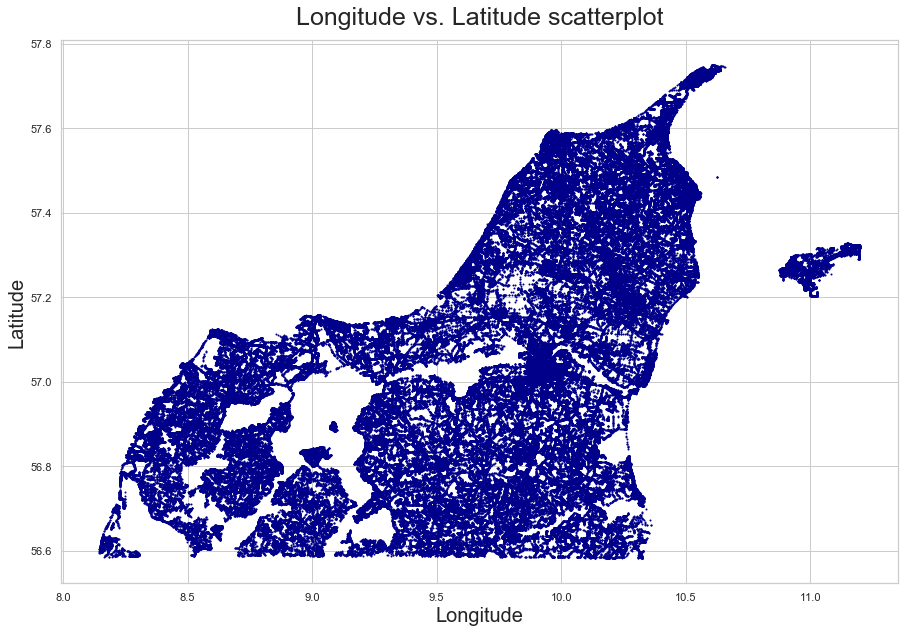

In [36]:
%matplotlib inline
tl.scatterplot(dataframe)

To improve the clustering results, we decided to scale data.

In [26]:
dataframe_scaled_reduced = tl.get_scaled_reduced_dataframe(dataframe)

Here we run the Random Initialization K-means and store all the variables we will need to plot. The same passages will be replicated for K-means++ later.

In [27]:
clusters, distinct_clusters, centroids, dataframe_scaled_reduced_updated = tl.k_means_random_init(dataframe_scaled_reduced)

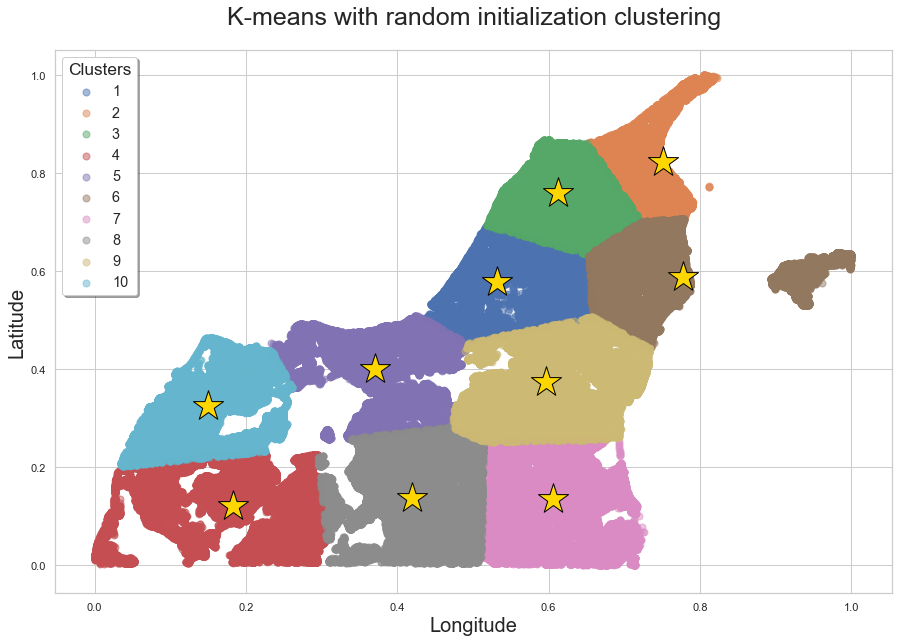

In [28]:
tl.random_init_scatterplot(dataframe_scaled_reduced_updated, distinct_clusters, centroids)

While here we run the first simulation: we run the algorithm ten times to check what happens.

In [29]:
times_random_init, inertias_random_init, iterations_random_init = tl.simulation_random_init(dataframe_scaled_reduced)

In [30]:
clusters_, distinct_clusters_, centroids_, dataframe_scaled_reduced_updated_ = tl.k_means_plus_plus(dataframe_scaled_reduced)

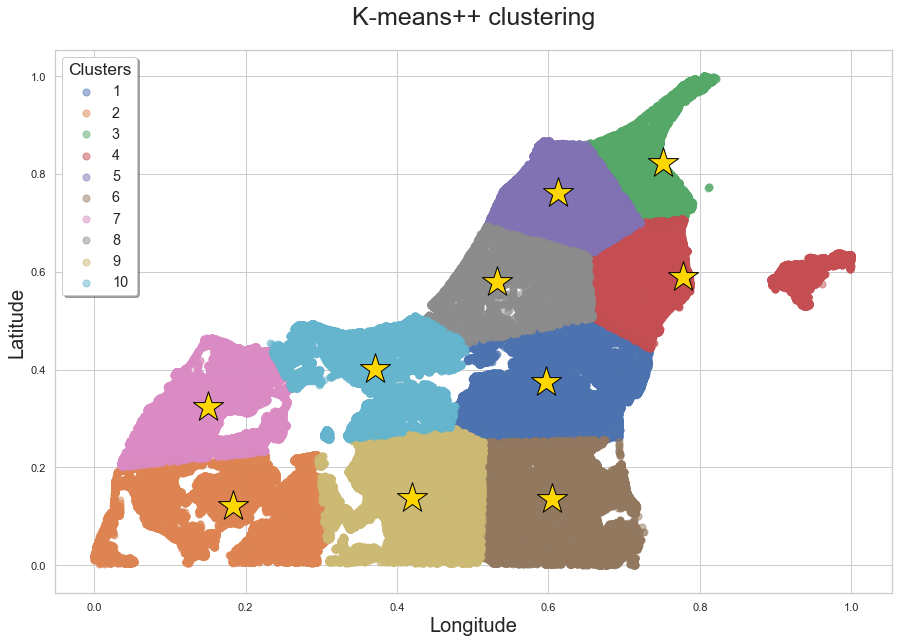

In [31]:
tl.plus_plus_scatterplot(dataframe_scaled_reduced_updated_, distinct_clusters, centroids)

In [32]:
times_plus_plus, inertias_plus_plus, iterations_plus_plus = tl.simulation_plus_plus(dataframe_scaled_reduced)

The first element we were eager to analyze was the execution time of both the versions of the algorithm. As most of people think, the K-means++ should perform better by this point of view, but that is not totally correct.
The first step of the algorithm, indeed, takes an extra amount of time if compared to the Random Initialization approach. Why that? Because while in the second case the centroids are randomly chosen, in the first one, on the contrary, just one of the gets picked at random, and the following ones have to be computed through a distance metric which aims to spread them in the space.
The plot corroborates this statement.

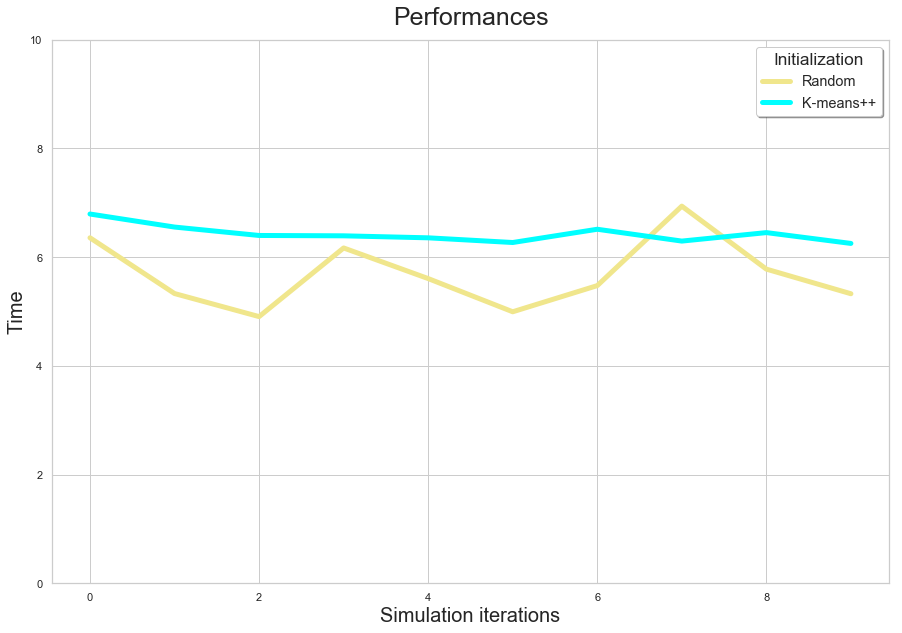

In [33]:
tl.performance_plot(times_random_init, times_plus_plus)

Secondly, we wanted to check how the two methods did in reducing intra-clusters variance. As we can see, there is an absolute better behaviour of K-means++, which shows to yield a constant inertia rate (metric used to analyze deviance "within"), while the variability in the other case is quite heterogeneous.

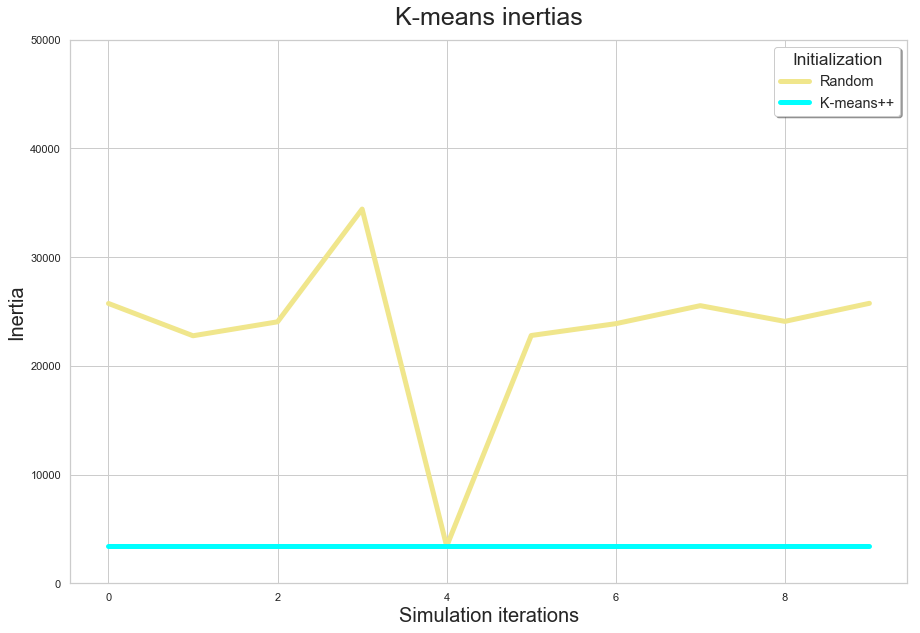

In [34]:
tl.inertias_plot(inertias_random_init, inertias_plus_plus)

And, last but not least, the main issue addressed by K-means++ solution: reducing the number of iterations by properly choosing the initial centroids.
The plot speaks by itself: in each simulation the number of iterations taken by the K-means++ method to reach convergence always remain constant, while in the other case it varies from 3 to 6 total iterations.

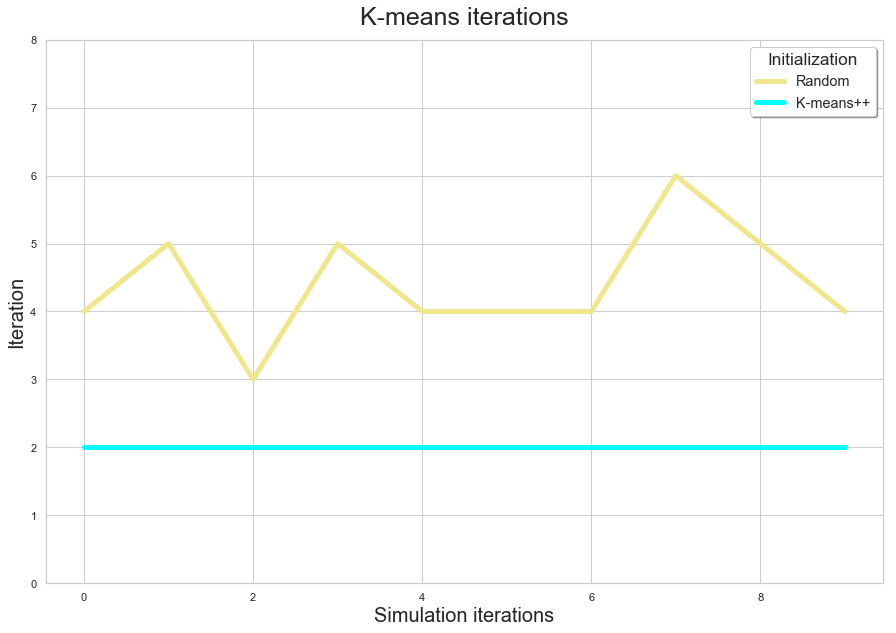

In [35]:
tl.iterations_plot(iterations_random_init, iterations_plus_plus)

In conclusion: running ten times these two version of K-means, we have been able to confirm that, in the case ++ initialization, the results in terms of iterations and inertia are evidently enhanced as compared to the randomic initialization case, leading to maybe slower time of execution but better overall performance in reducing the cost functions above which the K-means algorithm is based on.